In [59]:
import pandas as pd
import numpy as np
from skimpy import clean_columns
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import seaborn as sns


# Read Data

In [60]:
# Read literature review data.

lit_review_data = pd.read_csv("lit_review_data.csv")
lit_review_data = clean_columns(lit_review_data)
lit_review_data


21 column names have been cleaned

,title,author,year,country,continent,climate,comparison,response,response_category,local_factor,...,local_effect,landscape,landscape_gradient,minimum_complexity,maximum_complexity,landscape_effect,interaction_details,interaction_effect_simple,interaction_effect,description
0,A macro-scale perspective on within-farm manag...,Amano et al.,2011,Japan,Asia,NaN,Conventional,Spider abundance,Natural enemy,Pesticide use,...,Negative,The proportion of forest area surrounding the ...,"<20% forest, >20% forest",NaN,NaN,Positive,NS,NS,NS,A multilevel modelling approach revealed that ...
1,A multitaxa assessment of the effectiveness of...,Boetzel et al.,2021,Germany,Europe,NaN,Conventional,Cicada species richness,Arthropod,"Flower field age (new, refreshed, continuous)",...,NS,The amount of seminatural habitat (forest edge...,3.6-25% semi-natural habitat,3.6,25.0,NS,NS,NS,NS,All other taxonomic groups showed no significa...
2,A multitaxa assessment of the effectiveness of...,Boetzel et al.,2021,Germany,Europe,NaN,Conventional,Orthopteran species richness,Arthropod,"Flower field age (new, refreshed, continuous)",...,NS,The amount of seminatural habitat (forest edge...,3.6-25% semi-natural habitat,3.6,25.0,NS,NS,NS,NS,All other taxonomic groups showed no significa...
3,A multitaxa assessment of the effectiveness of...,Boetzel et al.,2021,Germany,Europe,NaN,Conventional,Bee species richness,Pollinator,"Flower field age (new, refreshed, continuous)",...,NS,The amount of seminatural habitat (forest edge...,3.6-25% semi-natural habitat,3.6,25.0,Positive,NS,NS,NS,An increasing proportion of seminatural habita...
4,A multitaxa assessment of the effectiveness of...,Boetzel et al.,2021,Germany,Europe,NaN,Conventional,Butterfly species richness,Pollinator,"Flower field age (new, refreshed, continuous)",...,NS,The amount of seminatural habitat (forest edge...,3.6-25% semi-natural habitat,3.6,25.0,NS,NS,NS,NS,All other taxonomic groups showed no significa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,Wild bee pollinators provide the majority of c...,Winfree et al.,2007,United States,North America,NaN,Conventional,Abundance (wood-nesting bees),Pollinator,Organic,...,NS,We analysed landscape cover as the proportion ...,3-64% woodland,3.0,64.0,NS,NS,NS,NS,The abundance of wood-nesting bees was associa...
577,Wild bee pollinators provide the majority of c...,Winfree et al.,2007,United States,North America,NaN,Conventional,Wild bee visitation,Pollinator,Local floral resources,...,NS,We analysed landscape cover as the proportion ...,3-64% woodland,3.0,64.0,NS,NS,NS,NS,"Similarly, no individual variables were strong..."
578,Wild bee pollinators provide the majority of c...,Winfree et al.,2007,United States,North America,NaN,Conventional,Abundance (eusocial bees),Pollinator,Local floral resources,...,NS,We analysed landscape cover as the proportion ...,3-64% woodland,3.0,64.0,NS,NS,NS,NS,"Similarly, no individual variables were strong..."
579,Wild bee pollinators provide the majority of c...,Winfree et al.,2007,United States,North America,NaN,Conventional,Abundance (solitary bees),Pollinator,Local floral resources,...,Positive,We analysed landscape cover as the proportion ...,3-64% woodland,3.0,64.0,NS,NS,NS,NS,The abundance of solitary bees showed little a...


In [61]:
lit_review_data["interaction_effect"].unique()


array(['NS', 'S'], dtype=object)

In [62]:
# Convert column data types.

lit_review_data[
    [
        "title",
        "author",
        "country",
        "continent",
        "comparison",
        "response",
        "response_category",
        "local_factor",
        "local_strategy",
        "local_effect",
        "landscape",
        "landscape_effect",
        "interaction_effect",
    ]
] = lit_review_data.loc[
    :,
    [
        "title",
        "author",
        "country",
        "continent",
        "comparison",
        "response",
        "response_category",
        "local_factor",
        "local_strategy",
        "local_effect",
        "landscape",
        "landscape_effect",
        "interaction_effect",
    ],
].astype(
    "category"
)


# Geographical Distribution

<AxesSubplot: title={'center': 'Continent Count'}>

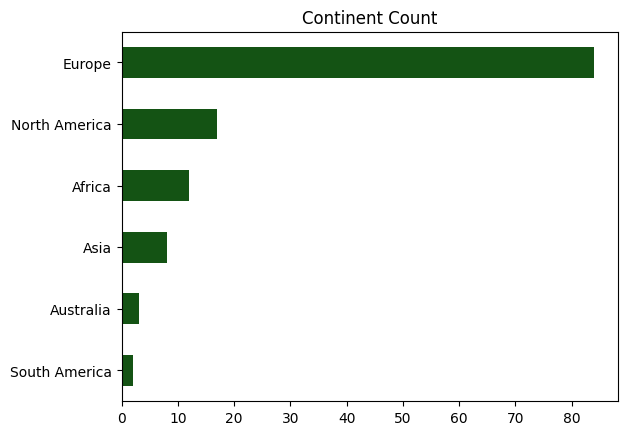

In [63]:
# By continent.

lit_review_data.drop_duplicates(subset="title").continent.value_counts(
    ascending=True
).plot(kind="barh", title="Continent Count", color="#145314")


<AxesSubplot: title={'center': 'Country Count'}, ylabel='continent,country'>

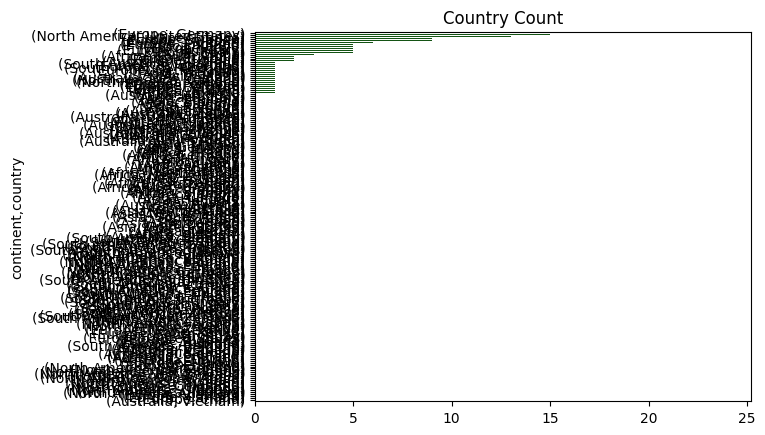

In [64]:
# By country.

lit_review_data.drop_duplicates(subset="title").groupby(
    "continent"
).country.value_counts().sort_values(ascending=True).plot(
    kind="barh", stacked=True, title="Country Count", color="#145314"
)

<AxesSubplot: title={'center': 'Country Count by Continent'}, xlabel='continent'>

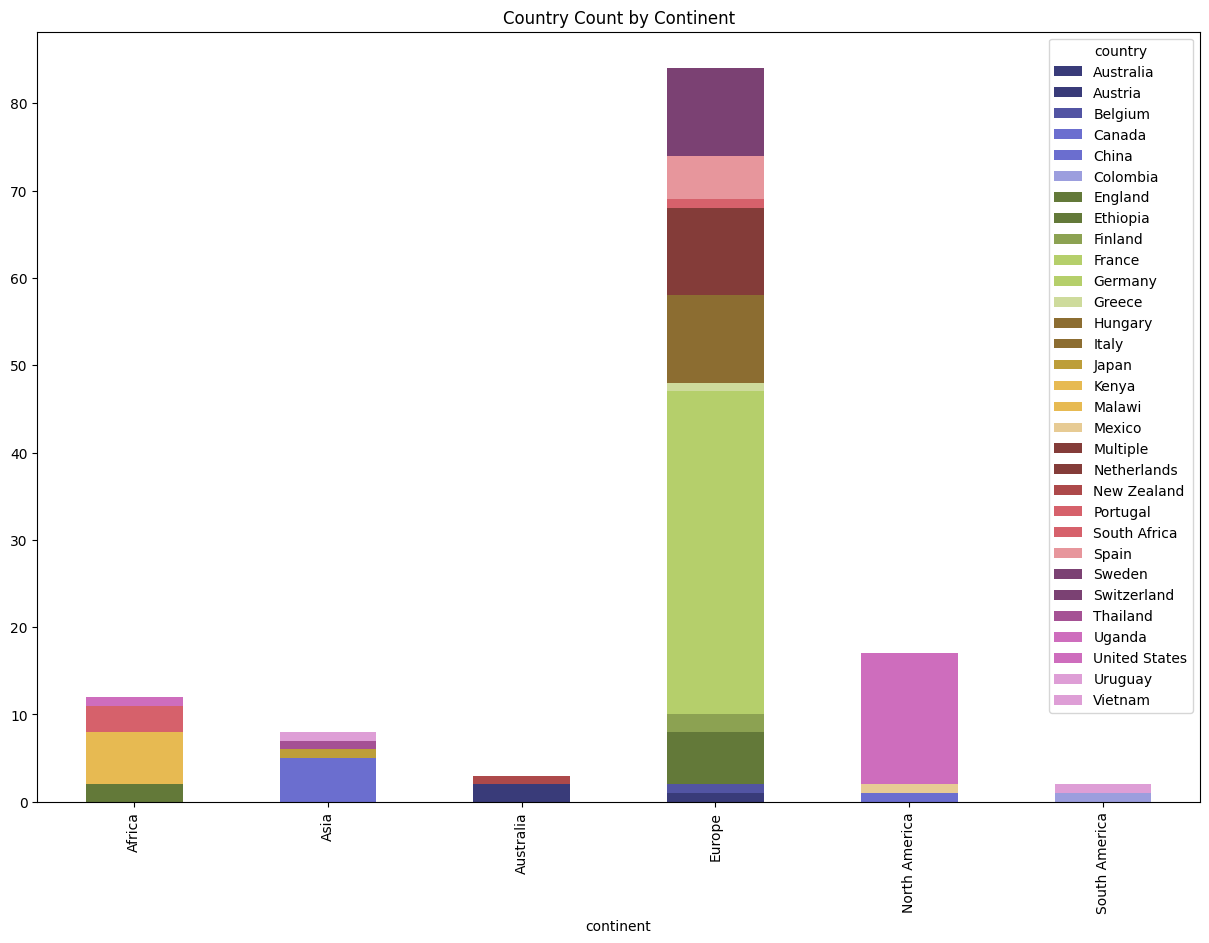

In [7]:
# By continent, separated by country.

lit_review_data.drop_duplicates(subset="title").groupby(
    ["continent", "country"]
).size().unstack().plot(
    kind="bar",
    stacked=True,
    cmap="tab20b",
    title="Country Count by Continent",
    figsize=(15, 10),
)


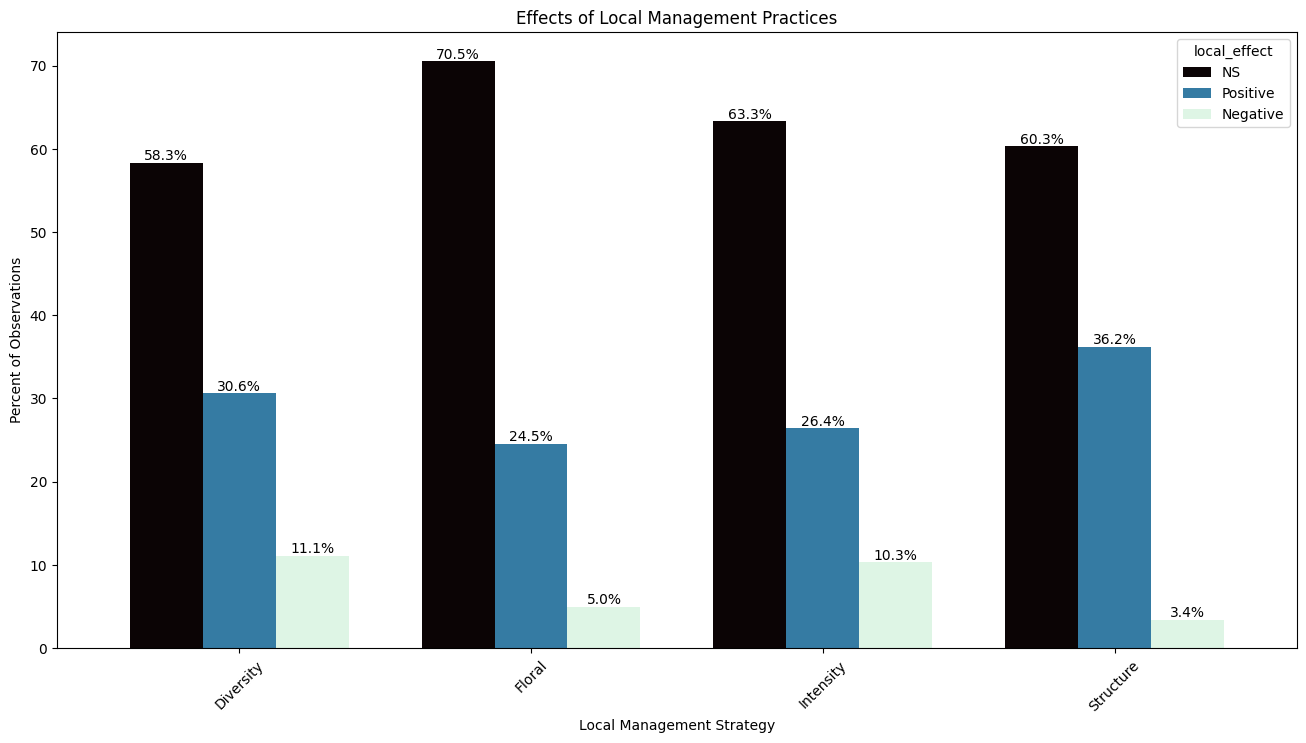

In [75]:
# Plotting local effects of local practices.

ax1 = (
    lit_review_data.groupby(["local_strategy"])[["local_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()[["NS", "Positive", "Negative"]]
    .plot(
        kind="bar",
        width=0.75,
        colormap="mako",
        title="Effects of Local Management Practices",
        ylabel="Percent of Observations",
        xlabel="Local Management Strategy",
        rot=45,
        figsize=(16, 8),
    )
)

for container in ax1.containers:
    ax1.bar_label(container, fontsize=10, fmt="%.1f%%")


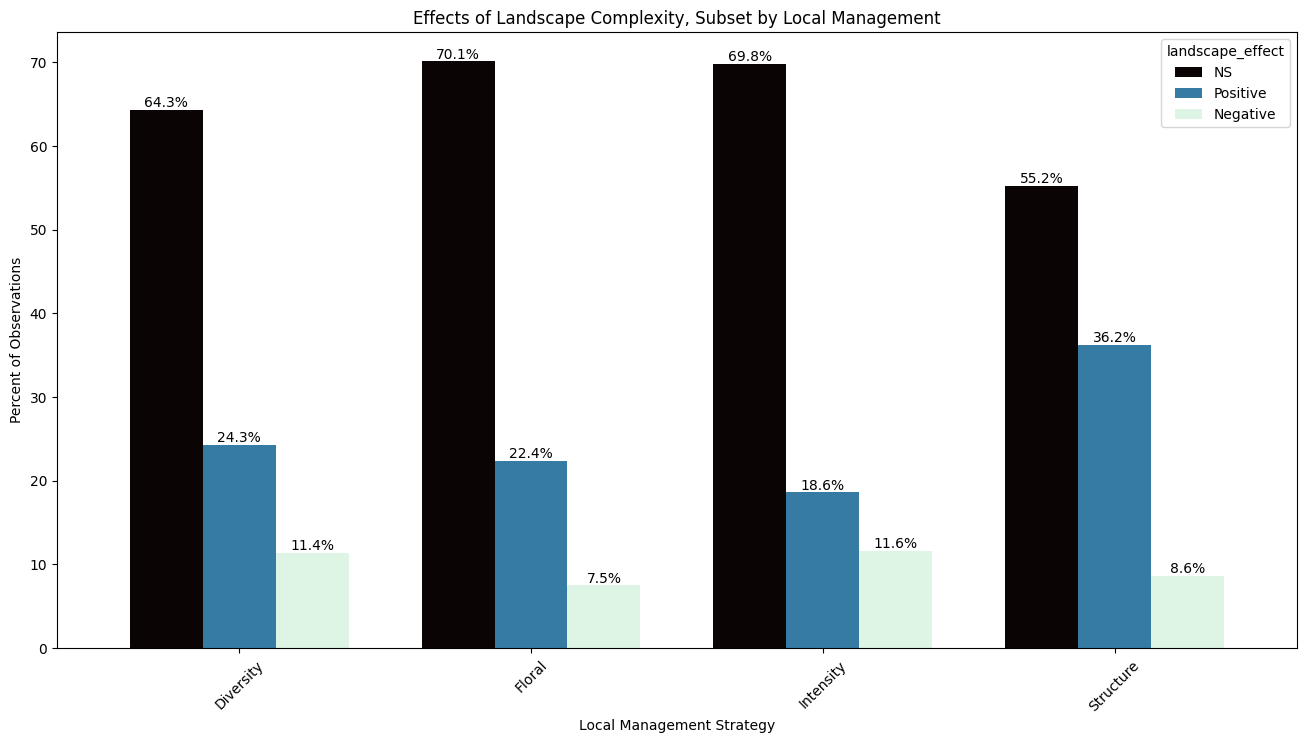

In [74]:
# Plotting effects of local practices across landscape gradients.

ax2 = (
    lit_review_data.groupby(["local_strategy"])[["landscape_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()[["NS", "Positive", "Negative"]]
    .plot(
        kind="bar",
        width=0.75,
        colormap="mako",
        title="Effects of Landscape Complexity, Subset by Local Management",
        ylabel="Percent of Observations",
        xlabel="Local Management Strategy",
        rot=45,
        figsize=(16, 8),
    )
)

for container in ax2.containers:
    ax2.bar_label(container, fontsize=10, fmt="%.1f%%")


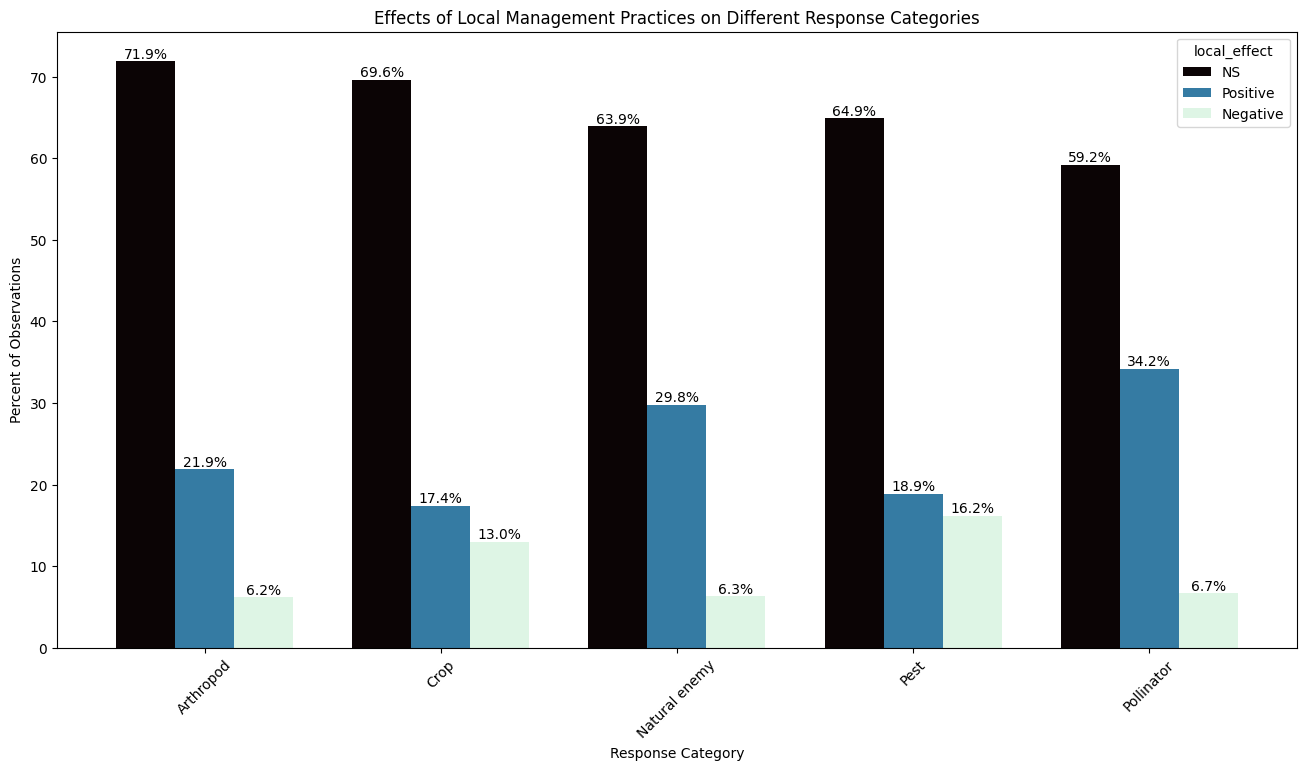

In [73]:
# Plotting effects of local practices for different response types.

ax3 = (
    lit_review_data.groupby(["response_category"])[["local_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()[["NS", "Positive", "Negative"]]
    .plot(
        kind="bar",
        width=0.75,
        colormap="mako",
        title="Effects of Local Management Practices on Different Response Categories",
        ylabel="Percent of Observations",
        xlabel="Response Category",
        rot=45,
        figsize=(16, 8),
    )
)

for container in ax3.containers:
    ax3.bar_label(container, fontsize=10, fmt="%.1f%%")


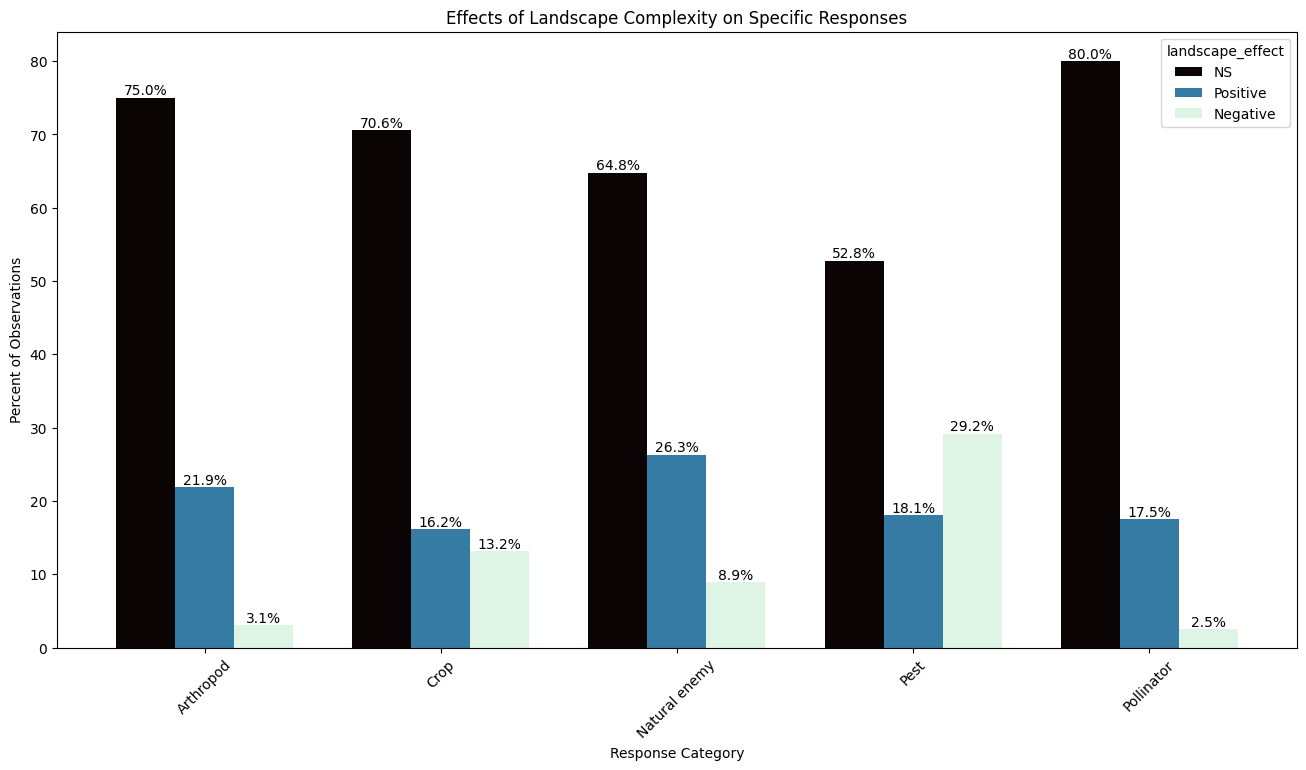

In [72]:
# Plotting effects of local practices across landscape gradients for different response types.

ax3 = (
    lit_review_data.groupby(["response_category"])[["landscape_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()[["NS", "Positive", "Negative"]]
    .plot(
        kind="bar",
        width=0.75,
        colormap="mako",
        title="Effects of Landscape Complexity on Specific Responses",
        ylabel="Percent of Observations",
        xlabel="Response Category",
        rot=45,
        figsize=(16, 8),
    )
)

for container in ax3.containers:
    ax3.bar_label(container, fontsize=10, fmt="%.1f%%")


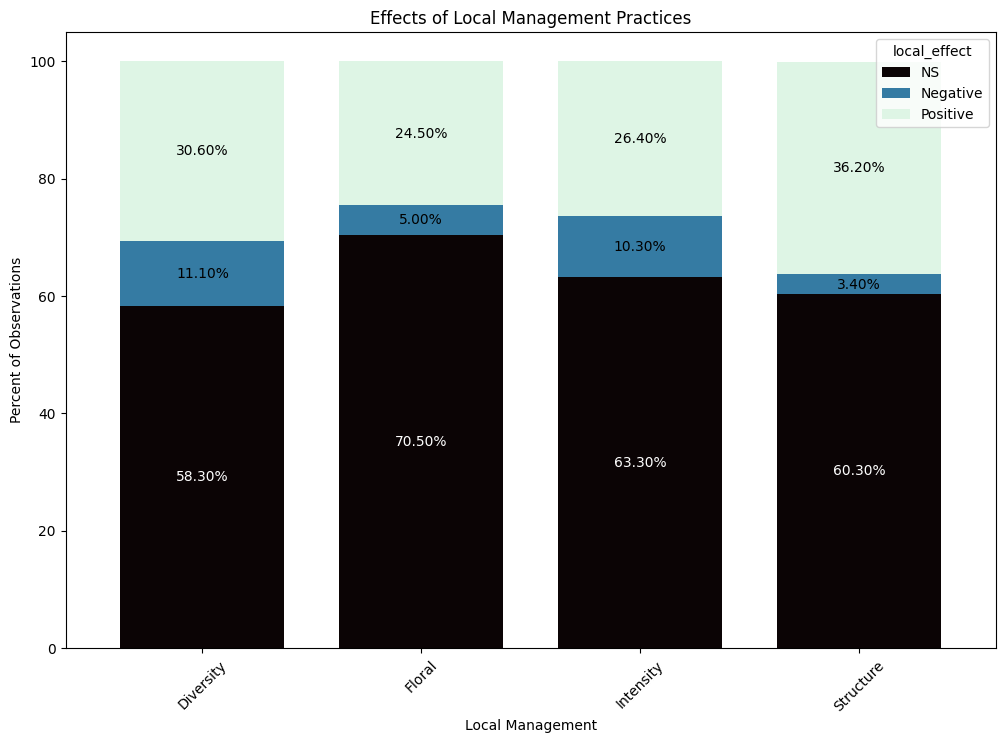

In [12]:
# Plotting effects of local management.

ax5 = (
    lit_review_data.groupby(["local_strategy"])[["local_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()
    .plot(
        kind="bar",
        stacked=True,
        width=0.75,
        colormap="mako",
        title="Effects of Local Management Practices",
        ylabel="Percent of Observations",
        xlabel="Local Management",
        rot=45,
        figsize=(12, 8),
    )
)

label_colors = ["white", "black", "black"]

for i, container in enumerate(ax5.containers):
    ax5.bar_label(
        container, fontsize=10, label_type="center", fmt="%.2f%%", color=label_colors[i]
    )


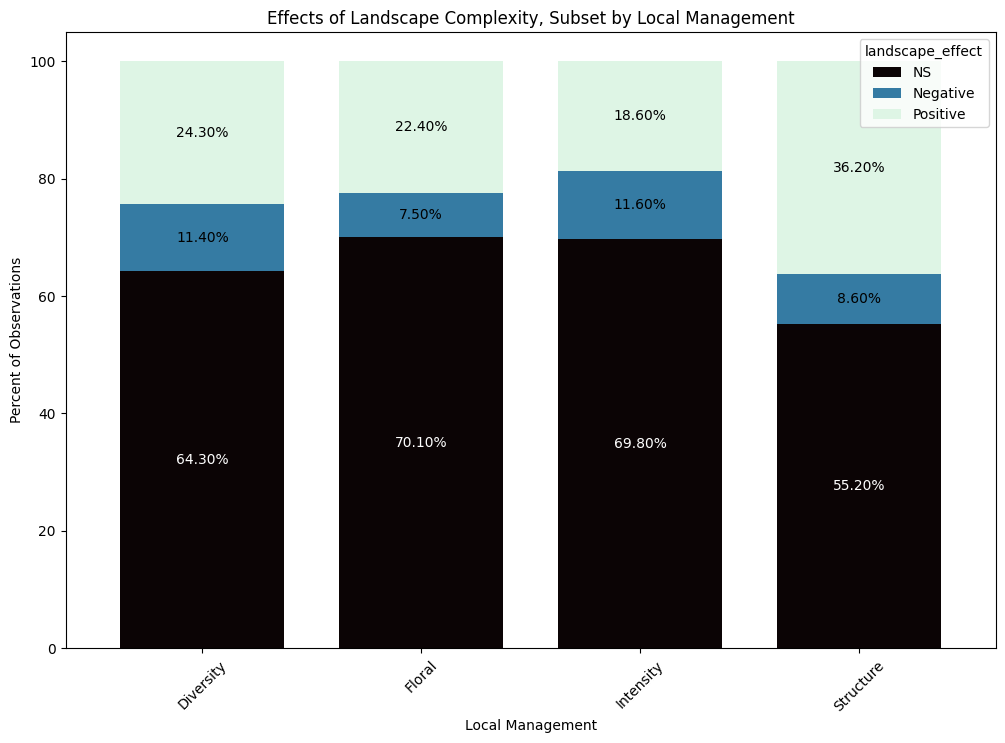

In [13]:
# Plotting effects of local management across landscape gradients.

ax6 = (
    lit_review_data.groupby(["local_strategy"])[["landscape_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()
    .plot(
        kind="bar",
        stacked=True,
        width=0.75,
        colormap="mako",
        title="Effects of Landscape Complexity, Subset by Local Management",
        ylabel="Percent of Observations",
        xlabel="Local Management",
        rot=45,
        figsize=(12, 8),
    )
)

label_colors = ["white", "black", "black"]

for i, container in enumerate(ax6.containers):
    ax6.bar_label(
        container, fontsize=10, label_type="center", fmt="%.2f%%", color=label_colors[i]
    )


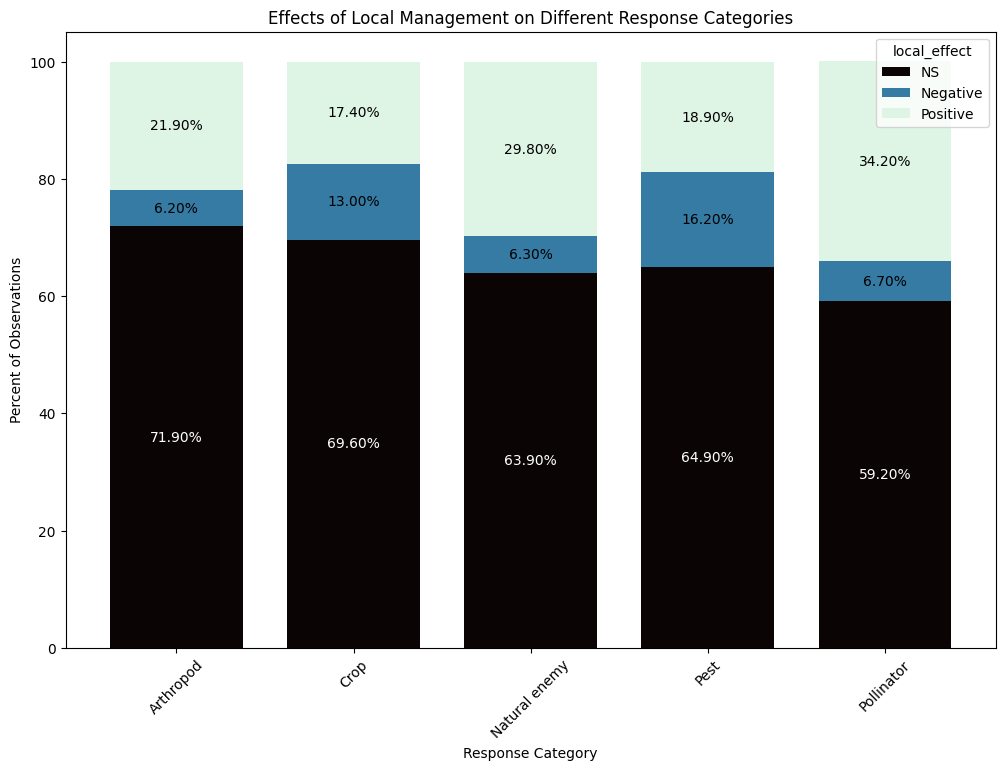

In [14]:
# Plotting effects of local management on different response types.

ax7 = (
    lit_review_data.groupby(["response_category"])[["local_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()
    .plot(
        kind="bar",
        stacked=True,
        width=0.75,
        colormap="mako",
        title="Effects of Local Management on Different Response Categories",
        ylabel="Percent of Observations",
        xlabel="Response Category",
        rot=45,
        figsize=(12, 8),
    )
)

label_colors = ["white", "black", "black"]

for i, container in enumerate(ax7.containers):
    ax7.bar_label(
        container, fontsize=10, label_type="center", fmt="%.2f%%", color=label_colors[i]
    )


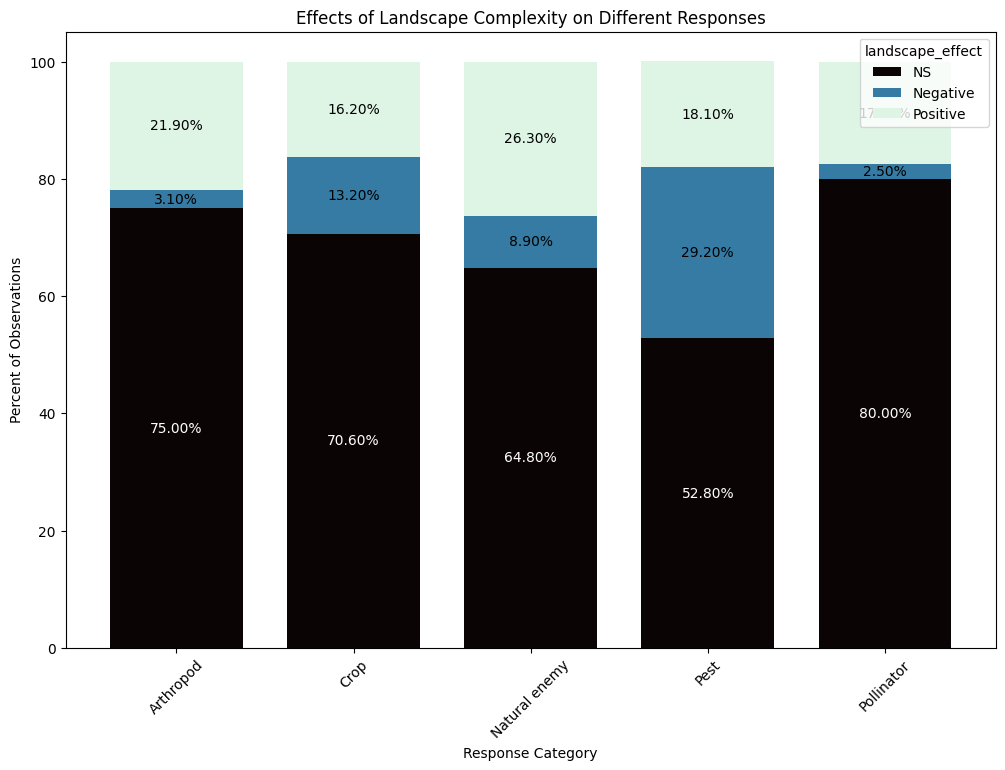

In [15]:
# Plotting effects of local management across landscape gradients on different response types.

ax8 = (
    lit_review_data.groupby(["response_category"])[["landscape_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()
    .plot(
        kind="bar",
        stacked=True,
        width=0.75,
        colormap="mako",
        title="Effects of Landscape Complexity on Different Responses",
        ylabel="Percent of Observations",
        xlabel="Response Category",
        rot=45,
        figsize=(12, 8),
    )
)

label_colors = ["white", "black", "black"]

for i, container in enumerate(ax8.containers):
    ax8.bar_label(
        container, fontsize=10, label_type="center", fmt="%.2f%%", color=label_colors[i]
    )


**Mako Color Hex Codes**

- '0B0405'  
- '357BA3'  
- 'DEF5E5'

In [76]:
lit_review_data.insert(
    loc=14,
    column="gradient_range",
    value=lit_review_data["maximum_complexity"] - lit_review_data["minimum_complexity"],
)


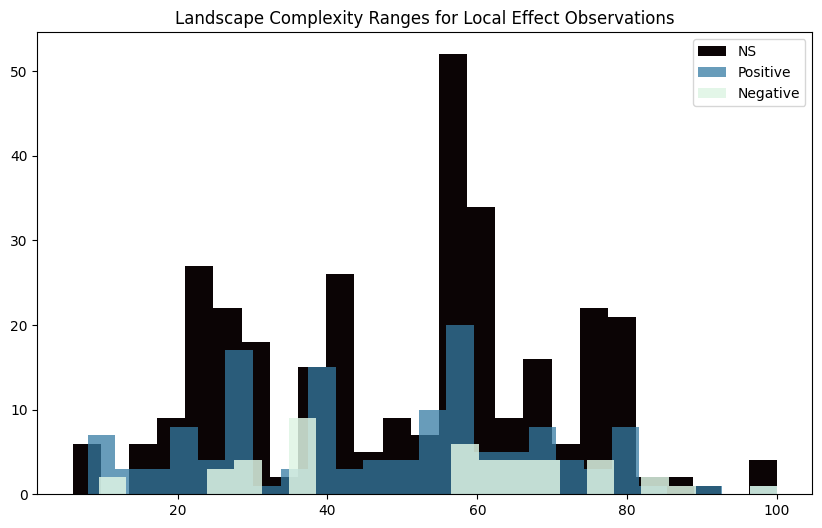

In [90]:
# Gradient ranges for local effect observations

plt.figure(figsize=(10, 6))
plt.title('Landscape Complexity Ranges for Local Effect Observations')

plt.hist(
    lit_review_data.where(lit_review_data["local_effect"] == "NS")["gradient_range"],
    alpha=1,
    label="NS",
    bins=25,
    color="#0B0405",
)

plt.hist(
    lit_review_data.where(lit_review_data["local_effect"] == "Positive")[
        "gradient_range"
    ],
    alpha=0.75,
    label="Positive",
    bins=25,
    color="#357BA3",
)

plt.hist(
    lit_review_data.where(lit_review_data["local_effect"] == "Negative")[
        "gradient_range"
    ],
    alpha=0.85,
    label="Negative",
    bins=25,
    color="#DEF5E5",
)

plt.legend(loc="upper right")
plt.show()


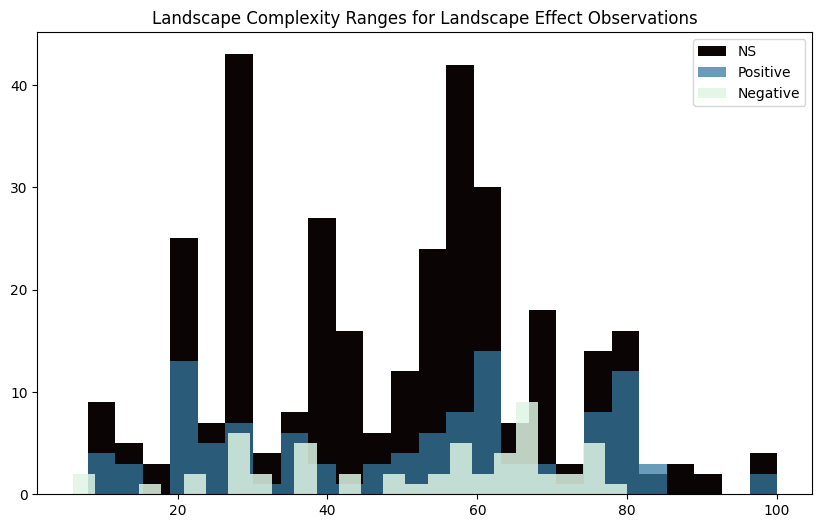

In [91]:
# Gradient ranges for landscape complexity effect observations

plt.figure(figsize=(10, 6))
plt.title('Landscape Complexity Ranges for Landscape Complexity Effect Observations')

plt.hist(
    lit_review_data.where(lit_review_data["landscape_effect"] == "NS")["gradient_range"],
    alpha=1,
    label="NS",
    bins=25,
    color="#0B0405",
)

plt.hist(
    lit_review_data.where(lit_review_data["landscape_effect"] == "Positive")[
        "gradient_range"
    ],
    alpha=0.75,
    label="Positive",
    bins=25,
    color="#357BA3",
)

plt.hist(
    lit_review_data.where(lit_review_data["landscape_effect"] == "Negative")[
        "gradient_range"
    ],
    alpha=0.85,
    label="Negative",
    bins=25,
    color="#DEF5E5",
)

plt.legend(loc="upper right")
plt.show()


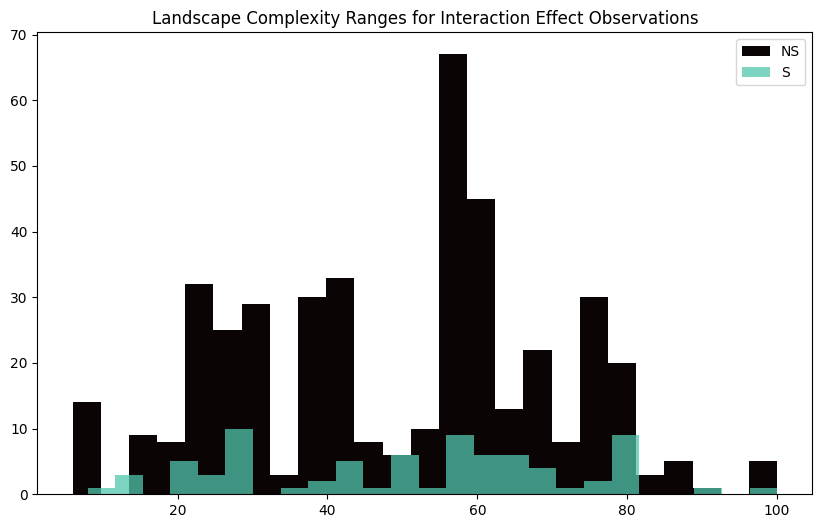

In [101]:
# Gradient ranges for interaction effect

plt.figure(figsize=(10, 6))
plt.title('Landscape Complexity Ranges for Interaction Effect Observations')

plt.hist(
    lit_review_data.where(lit_review_data["interaction_effect"] == "NS")["gradient_range"],
    alpha=1,
    label="NS",
    bins=25,
    color="#0B0405",
)

plt.hist(
    lit_review_data.where(lit_review_data["interaction_effect"] == "S")[
        "gradient_range"
    ],
    alpha=0.75,
    label="S",
    bins=25,
    color="#50c6ac",
)

plt.legend(loc="upper right")
plt.show()
